In [3]:

import geopandas as gpd
import matplotlib.pyplot as plt



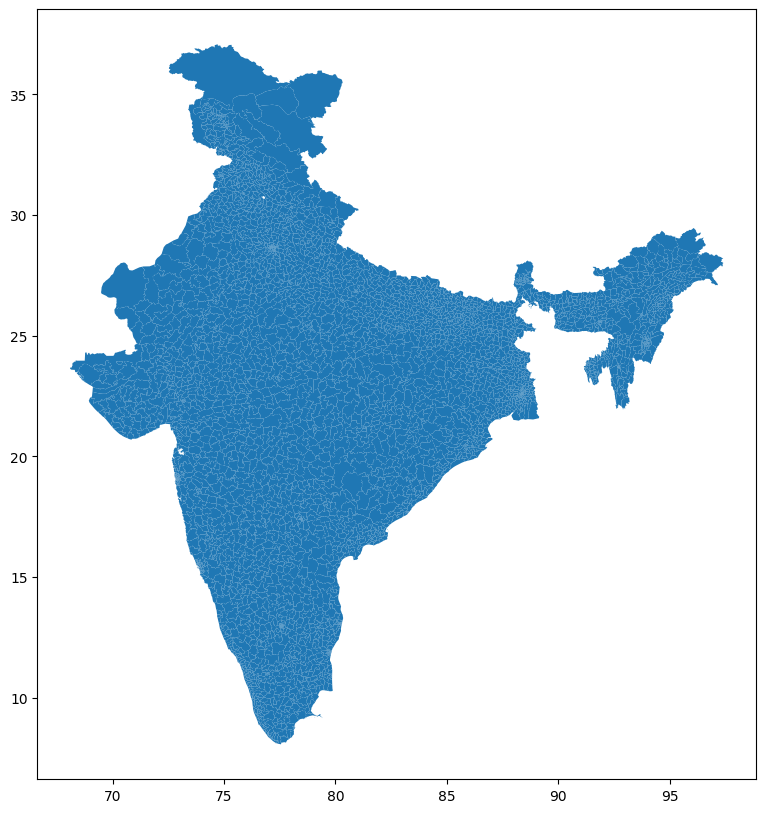

In [4]:
gdf = gpd.read_file("India_AC.shp")
gdf.plot(figsize=(10, 10))
plt.show()

In [11]:
gdf.columns
gdf.sample(10)


,OBJECTID,ST_CODE,ST_NAME,DT_CODE,DIST_NAME,AC_NO,AC_NAME,PC_NO,PC_NAME,PC_ID,STATUS,Shape_Leng,Shape_Area,geometry
3773,11,9,UTTAR PRADESH,8.0,BAGHPAT *,51,Baraut,11,BAGHPAT,911,None,0.981083,0.034580,"POLYGON ((77.28493 29.15862, 77.30352 29.15046..."
645,34,33,TAMIL NADU,26.0,VIRUDHUNAGAR,205,Sivakasi,34,VIRUDHUNAGAR,3334,None,0.621006,0.014487,"POLYGON ((77.72308 9.53022, 77.73546 9.52643, ..."
3376,11,3,PUNJAB,15.0,MANSA *,98,Budhlada (SC),11,BATHINDA,311,None,1.651868,0.066758,"POLYGON ((75.63358 30.06979, 75.64063 30.0653,..."
41,1,13,NAGALAND,7.0,KOHIMA,12,Tseminyu,1,NAGALAND,1301,Pre delimitation,0.863591,0.027671,"POLYGON ((94.24652 26.00351, 94.25807 26.00509..."
4088,50,9,UTTAR PRADESH,44.0,KAUSHAMBI *,251,Sirathu,50,KAUSHAMBI (SC),950,None,1.261371,0.053794,"POLYGON ((81.3383 25.81073, 81.36139 25.77577,..."
63,13,18,ASSAM,15.0,DIBRUGARH,116,Dibrugarh,13,DIBRUGARH,1813,Pre delimitation,1.182483,0.041492,"POLYGON ((95.21585 27.64153, 95.19133 27.60512..."
285,5,1,JAMMU & KASHMIR,10.0,UDHAMPUR,62,RAM NAGAR,5,UDHAMPUR,0,Pre delimitation,0.265774,0.002339,"POLYGON ((75.15218 32.69583, 75.14099 32.69304..."
2334,16,29,KARNATAKA,23.0,HASSAN,193,Shravanabelagola,16,HASSAN,2916,None,1.710236,0.071303,"POLYGON ((76.42913 13.17274, 76.44468 13.16948..."
1663,1,7,DELHI,NaN,None,14,Shalimar Bagh,1,CHANDNI CHOWK,701,None,0.115847,0.000782,"POLYGON ((77.1367 28.72997, 77.14125 28.73289,..."
3892,20,9,UTTAR PRADESH,16.0,FIROZABAD,96,Jasrana,20,FIROZABAD,920,None,1.499972,0.066893,"POLYGON ((78.59946 27.50814, 78.60691 27.51075..."


In [ ]:
from shapely.geometry import Point

gdf = gpd.read_file("India_AC.shp").to_crs(epsg=4326)
gdf_proj = gdf.to_crs(epsg=3857)

def get_assembly(lat, lon):
    point = Point(lon, lat)

    result = gdf[gdf.intersects(point)]
    if not result.empty:
        row = result.iloc[0]
    else:
        point_proj = gpd.GeoSeries([point], crs=4326).to_crs(3857).iloc[0]
        nearest_idx = gdf_proj.distance(point_proj).idxmin()
        row = gdf.loc[nearest_idx]

    return {
        "state": row.get("ST_NAME"),
        "district": row.get("DIST_NAME"),
        "assembly": row.get("AC_NAME"),
        "ac_number": int(row.get("AC_NO"))
    }

lat = 19.036146
lon = 73.061721

print(get_assembly(lat, lon))


{'state': 'MAHARASHTRA', 'district': 'RAIGARH', 'assembly': 'Panvel', 'ac_number': 188}


In [7]:
print(gdf.columns)



Index(['OBJECTID', 'ST_CODE', 'ST_NAME', 'DT_CODE', 'DIST_NAME', 'AC_NO',
       'AC_NAME', 'PC_NO', 'PC_NAME', 'PC_ID', 'STATUS', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')


In [8]:
import geopandas as gpd
from shapely.geometry import Point

# load
gdf = gpd.read_file("India_AC.shp").to_crs(epsg=4326)

# 🔥 FILTER OUT INVALID ROWS
gdf = gdf[
    (gdf["AC_NO"] > 0) &
    (gdf["AC_NAME"].notna())
].reset_index(drop=True)

# projected copy
gdf_proj = gdf.to_crs(epsg=3857)

def get_assembly(lat, lon):
    point = Point(lon, lat)
    point_proj = gpd.GeoSeries([point], crs=4326).to_crs(3857).iloc[0]

    nearest_idx = gdf_proj.distance(point_proj).idxmin()
    row = gdf.loc[nearest_idx]

    return {
        "state": row.get("ST_NAME"),
        "district": row.get("DIST_NAME"),
        "assembly": row.get("AC_NAME"),
        "ac_number": int(row.get("AC_NO"))
    }
lat = 26.4697513
lon = 80.289904

print(get_assembly(lat, lon))


{'state': 'UTTAR PRADESH', 'district': 'KANPUR NAGAR', 'assembly': 'Govindnagar', 'ac_number': 212}
